# AVAX Model

In [154]:
# Importing Python Packages

In [155]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
# Downloading data

df = pd.read_csv('avax.csv', index_col = 'Date')
df.index = pd.to_datetime (df.index)
df.columns

Index(['Price', 'Volume', 'CirSupply', 'Velocity', 'Valuation'], dtype='object')

# Correlation Matrix

In [158]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

/Users/svetlanatimchenko/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,Volume,CirSupply,Velocity,Valuation
Price,0.006358,0.001236,0.000178,0.001147,0.008471
Volume,0.001236,0.164914,0.001552,0.161761,0.323642
CirSupply,0.000178,0.001552,0.002314,-0.000809,-0.001498
Velocity,0.001147,0.161761,-0.000809,0.168159,0.323384
Valuation,0.008471,0.323642,-0.001498,0.323384,0.659389


In [159]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix

/Users/svetlanatimchenko/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,Volume,CirSupply,Velocity,Valuation
Price,1.000000,0.038158,0.046306,0.035078,0.129252
Volume,0.038158,1.000000,0.079458,0.971371,0.979546
CirSupply,0.046306,0.079458,1.000000,-0.041005,-0.037734
Velocity,0.035078,0.971371,-0.041005,1.000000,0.967967
Valuation,0.129252,0.979546,-0.037734,0.967967,1.000000


In [160]:
import statsmodels.api as sm

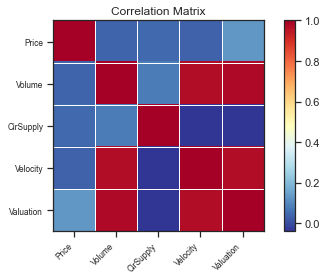

In [161]:
sm.graphics.plot_corr(corr_matrix, xnames=list(corr_matrix.columns))
plt.show()

In [162]:
val = df ['Valuation']

In [163]:
val.describe()

count    695.000000
mean       0.365525
std        0.746331
min        0.000000
25%        0.080000
50%        0.200000
75%        0.390000
max       15.270000
Name: Valuation, dtype: float64

# Chart Visualisation

In [164]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# Download the data
data = pd.read_csv('avax.csv',
                   parse_dates=['Date'],
                   index_col=['Date'])
data.head()

,Price,Volume,CirSupply,Velocity,Valuation
Date,,,,,
2020-09-24,4.57,21046683,24500000,0.86,3.37
2020-09-25,4.71,11852948,24500001,0.48,1.10
2020-09-26,4.54,6015212,24499998,0.25,0.27
2020-09-27,4.63,5024973,24499998,0.21,0.19
2020-09-28,4.20,4904941,24500001,0.20,0.17


In [167]:
price = df ['Price']

In [168]:
price.describe()

count    695.000000
mean      40.764921
std       33.054725
min        2.910000
25%       13.440000
50%       29.020000
75%       68.525000
max      134.530000
Name: Price, dtype: float64

In [169]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

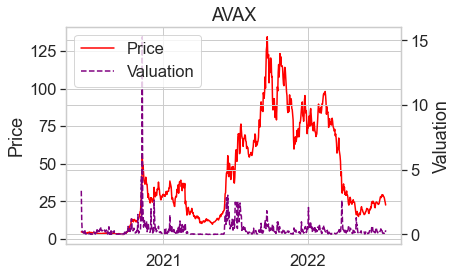

In [170]:
# Create figure and plot space
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(6, 4))
axb = ax.twinx()

# Add x-axis and y-axis
ax.plot(data.index.values, price, color='red', label='Price')

# Set title and labels for axes
ax.set(xlabel="",
       ylabel="Price",
       title="AVAX")

# Plotting on the second y-axis
axb.set_ylabel('Valuation')
axb.plot(data.index.values, val, color='purple', linestyle='--', label='Valuation')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=47))

plt.show()

# Linear Regression

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Velocity vs Valuation'}, xlabel='Velocity', ylabel='Valuation'>

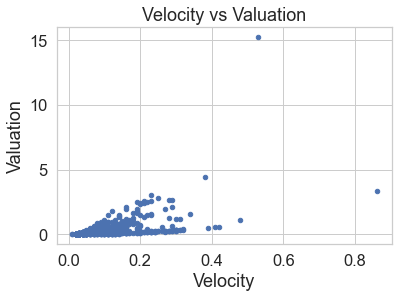

In [172]:
df.plot (kind='scatter', x='Velocity', y='Valuation', title='Velocity vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Circulation supply vs Valuation'}, xlabel='CirSupply', ylabel='Valuation'>

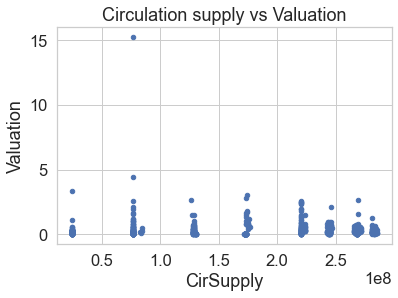

In [173]:
df.plot (kind='scatter', x='CirSupply', y='Valuation', title='Circulation supply vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Volume vs Valuation'}, xlabel='Volume', ylabel='Valuation'>

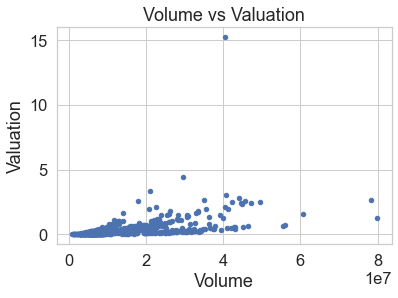

In [174]:
df.plot (kind='scatter', x='Volume', y='Valuation', title='Volume vs Valuation')

In [175]:
import sklearn.linear_model as lm

In [176]:
lr =lm.LinearRegression()

In [177]:
df.columns = df.columns.str.strip()

In [178]:
x = df.Volume       #Independent variable
y = df.Valuation        #Dependent variable

In [179]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1,1) #reshape to column

In [180]:
lr.fit (x,y)

LinearRegression()

Text(0.5, 0, 'Volume')

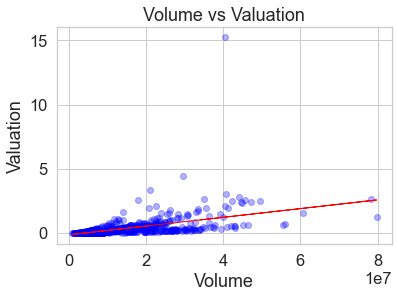

In [181]:
plt.scatter (x,y, color ='blue', alpha=0.3)
plt.plot (x, lr.predict (x), color = 'red', linewidth=1)
plt.title ('Volume vs Valuation')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

In [182]:
lr.predict (x)

array([ 5.84505375e-01,  2.72342087e-01,  7.41281009e-02,  4.05056110e-02,
        3.64300548e-02,  6.81110493e-03,  2.89710144e-03,  6.54047632e-02,
        1.33307159e-01, -2.90740398e-02, -1.91105014e-02, -5.34637474e-02,
        1.43261587e-02,  2.42951297e-02,  2.21072307e-03, -2.55448021e-02,
       -7.51038437e-03, -3.51534881e-02, -1.90367196e-02, -2.38150539e-02,
       -4.82596650e-02, -7.25344386e-02, -4.78371424e-02, -8.06399848e-02,
       -9.94454959e-02, -8.10845774e-02,  4.53323976e-02,  7.08725317e-02,
        6.01685603e-02,  2.50913490e-02,  5.07354733e-03, -3.24743651e-03,
       -5.46820138e-02,  1.48622910e-02,  3.21614027e-02, -7.14024830e-02,
        1.29775171e-01,  6.02317485e-02,  1.69762617e-02,  5.76480594e-02,
        1.20237957e-01,  9.06920085e-02,  1.34139742e-01,  1.90484531e-01,
        2.15603908e-01,  1.24527389e-01,  1.23359443e-01,  1.00119381e-01,
        1.10850957e-01,  1.18325300e-01,  1.23171813e-01,  1.06170613e-01,
        8.78507789e-02,  

In [183]:
R_Sq = r2_score (y, lr.predict (x))
R_Sq

0.2295794256053173

In [184]:
# Model Statistics

In [185]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Valuation~Volume',data=df).fit()
model1.params

Intercept   -1.301119e-01
Volume       3.395391e-08
dtype: float64

In [186]:
model1.pvalues

Intercept    2.298454e-03
Volume       3.548834e-41
dtype: float64

In [187]:
model1.rsquared

0.22957942560531708

In [188]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     206.5
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           3.55e-41
Time:                        01:03:11   Log-Likelihood:                -691.68
No. Observations:                 695   AIC:                             1387.
Df Residuals:                     693   BIC:                             1396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1301      0.043     -3.060      0.002      -0.214      -0.047
Volume      3.395e-08   2.36e-09     14.370      0.000    2.93e-08    3.86e-08
==============================================================================
Omnibus:                     1394.554   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2680196.788
Skew:                          14.624   Prob(JB):                         0.00
Kurtosis:                     305.817   Cond. No.                     3.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
val_pred=model1.predict(pd.DataFrame(df['Volume']))
val_pred

Date
2020-09-24    0.584505
2020-09-25    0.272342
2020-09-26    0.074128
2020-09-27    0.040506
2020-09-28    0.036430
                ...   
2022-08-15    0.471644
2022-08-16    0.388901
2022-08-17    0.541160
2022-08-18    0.416489
2022-08-19    1.024935
Length: 695, dtype: float64

In [190]:
df['val_pred']=-1.301119e-01*df['Volume']+3.395391e-08
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/693)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(2344829.6651252215, 0.36552517985611555, 6414960.7040703315)

# Multiple Linear Regression

In [191]:
import statsmodels.formula.api as smf
model2=smf.ols(formula='Valuation~Volume+Velocity',data=df).fit()
model2.params

Intercept   -3.726460e-01
Volume       2.499669e-08
Velocity     3.684614e+00
dtype: float64

In [192]:
val_pred=model2.predict(df[['Volume','Velocity']])
val_pred

Date
2020-09-24    3.322220
2020-09-25    1.692253
2020-09-26    0.698868
2020-09-27    0.526731
2020-09-28    0.486884
                ...   
2022-08-15    0.291440
2022-08-16    0.193679
2022-08-17    0.379464
2022-08-18    0.250835
2022-08-19    0.919847
Length: 695, dtype: float64

In [193]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           2.26e-70
Time:                        01:03:17   Log-Likelihood:                -621.25
No. Observations:                 695   AIC:                             1249.
Df Residuals:                     692   BIC:                             1262.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3726      0.043     -8.648      0.000      -0.457      -0.288
Volume        2.5e-08   2.25e-09     11.089      0.000    2.06e-08    2.94e-08
Velocity       3.6846      0.296     12.469      0.000       3.104       4.265
==============================================================================
Omnibus:                     1381.422   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2663122.879
Skew:                          14.299   Prob(JB):                         0.00
Kurtosis:                     304.904   Cond. No.                     2.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
import numpy as np
df['val_pred']=-3.726460e-01 + 2.499669e-08*df['Volume'] + 3.684614e+00*df['Velocity']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(0.5928086259130907, 0.36552517985611555, 1.6217996969359059)

In [195]:
import statsmodels.formula.api as smf
model3=smf.ols(formula='Valuation~Volume+Velocity+CirSupply',data=df).fit()
model3.params

Intercept   -3.919462e-01
Volume       2.436110e-08
Velocity     3.771682e+00
CirSupply    1.104505e-10
dtype: float64

In [196]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           3.56e-69
Time:                        01:03:19   Log-Likelihood:                -621.23
No. Observations:                 695   AIC:                             1250.
Df Residuals:                     691   BIC:                             1269.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3919      0.096     -4.077      0.000      -0.581      -0.203
Volume      2.436e-08   3.62e-09      6.733      0.000    1.73e-08    3.15e-08
Velocity       3.7717      0.488      7.737      0.000       2.815       4.729
CirSupply   1.105e-10   4.92e-10      0.225      0.822   -8.55e-10    1.08e-09
==============================================================================
Omnibus:                     1380.077   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2647695.434
Skew:                          14.269   Prob(JB):                         0.00
Kurtosis:                     304.026   Cond. No.                     4.37e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
val_pred=model3.predict(df[['Volume','Velocity','CirSupply']])
val_pred

Date
2020-09-24    3.367127
2020-09-25    1.709918
2020-09-26    0.700218
2020-09-27    0.525227
2020-09-28    0.484586
                ...   
2022-08-15    0.297572
2022-08-16    0.200489
2022-08-17    0.385166
2022-08-18    0.258001
2022-08-19    0.920849
Length: 695, dtype: float64

In [198]:
import numpy as np
df['val_pred']=-0.3919 + 2.436e-08*df['Volume'] + 3.7717*df['Velocity'] + 1.105e-10*df['CirSupply']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(0.5927869812863606, 0.36552517985611555, 1.6217404817903487)

In [199]:
model4=smf.ols(formula='Volume~Velocity+CirSupply',data=df).fit()
rsquared=model4.rsquared 
VIF=1/(1-rsquared)
VIF

2.8641024442912415

# Polynomial Regression

In [200]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [201]:
x=df.Volume
y=df.Valuation

In [202]:
degree=2
model5=make_pipeline (PolynomialFeatures (degree), lr)

In [203]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1, 1) #reshape to column

In [204]:
model5.fit (x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 8.959999999999994, 'Volume')

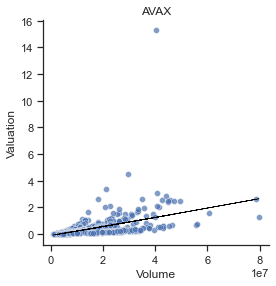

In [205]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="Volume", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.plot (x, model5.predict (x), color='black', linewidth=.5)
plt.title ('AVAX')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

Text(0.5, 8.959999999999994, 'Circulation Supply')

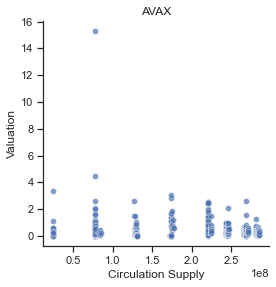

In [206]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="CirSupply", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.title ('AVAX')
plt.ylabel ('Valuation')
plt.xlabel ('Circulation Supply')